In [1]:
import numpy as np
import pandas as pd
import pickle
from utils import load_CPS_data, load_PENN_data, decompose_Y, compute_pi_cov, generate_simulation_components, parallel_experiments

In [2]:
data_dict = {}
RMSE = {}
bias = {}

# set n_jobs to the number of cores
num_cores = 36
num_experiments = 1000

## Load and Format Data

In [3]:
configs = {'Row 1': ['log_wage', 'min_wage', None],
           'Row 2': ['urate', 'min_wage', None],
           'Row 3': ['hours', 'min_wage', None],
            'Row 4': ['log_wage', 'open_carry', None],
            'Row 5': ['log_wage', 'abort_ban', None],
            'Row 6': ['log_wage', 'min_wage', 'Random'],
            'Row 7': ['log_gdp', 'dem', None],
            'Row 8': ['log_gdp', 'educ', None],
            'Row 9': ['log_gdp', 'dem', 'Random']}

TROP_dict = {'Row 1': [0.01, 0.2, 0.2],
             'Row 2': [1.6, 0.35, 0.011],
             'Row 3': [1.8, 0.2, 0.031],
            'Row 4':  [0, 0.35, 0.041],
            'Row 5': [0, 0.2, 0.281],
            'Row 6': [0, 0.2, 0.21],
            'Row 7': [0.3, 0.325, 0.016],
            'Row 8': [0.75, 0.275, 0.026],
            'Row 9': [0.4, 0.45, 0.003]}

for setting, config in list(configs.items())[:6]:
    
    print(setting)
    
    # load and process data for each setting
    outcome, treatment, option = config
    data = load_CPS_data(outcome, treatment)
    data_dict[setting] = data
    
    # run simulations
    simulation_components = generate_simulation_components(data)
    np.random.seed(0)
    RMSE[setting], bias[setting] = parallel_experiments(num_cores, num_experiments, simulation_components, TROP_dict[setting], option)

for setting, config in list(configs.items())[6:]:
    
    print(setting)
    
    # load and process data for each setting
    outcome, treatment, option = config
    data = load_PENN_data(outcome, treatment)
    data_dict[setting] = data
    
    # run simulations
    simulation_components = generate_simulation_components(data)
    np.random.seed(0)
    RMSE[setting], bias[setting] = parallel_experiments(num_cores, num_experiments, simulation_components, TROP_dict[setting], option)
    

Row 1
Row 2
Row 3
Row 4
Row 5
Row 6
Row 7
Row 8
Row 9


In [4]:
RMSE

{'Row 1': array([0.02577332, 0.02927782, 0.03716681, 0.04910175, 0.03249722,
        0.03154781]),
 'Row 2': array([0.2031808 , 0.21397748, 0.22558389, 0.38424902, 0.22440066,
        0.22093483]),
 'Row 3': array([0.16666944, 0.19904193, 0.20407271, 0.20842909, 0.18559285,
        0.20024313]),
 'Row 4': array([0.02374691, 0.02734513, 0.02672617, 0.04836394, 0.03166533,
        0.03123434]),
 'Row 5': array([0.02203551, 0.02510486, 0.0314178 , 0.04382877, 0.02750703,
        0.02735994]),
 'Row 6': array([0.02267736, 0.0253971 , 0.02492984, 0.04423942, 0.02802984,
        0.02657616]),
 'Row 7': array([0.02525596, 0.03626881, 0.040122  , 0.19819533, 0.04437354,
        0.0389131 ]),
 'Row 8': array([0.02495412, 0.03762705, 0.05239759, 0.17223327, 0.03998444,
        0.03910019]),
 'Row 9': array([0.0292038 , 0.03859893, 0.04406757, 0.12578273, 0.04130246,
        0.04372019])}

In [8]:
normalized_df = pd.DataFrame(columns=['outcome','treatment','TROP','SDID','SC','DID','MC','DIFP'])
for setting, config in list(configs.items()):
    outcome, treatment, option = config
    RMSEs = np.round(RMSE[setting]/np.min(RMSE[setting]),2)
    normalized_df.loc[len(normalized_df)] = [outcome, treatment] + list(RMSEs)
# save output to table
normalized_df.to_csv('table_1.csv')
normalized_df

,outcome,treatment,TROP,SDID,SC,DID,MC,DIFP
0,log_wage,min_wage,1.0,1.14,1.44,1.91,1.26,1.22
1,urate,min_wage,1.0,1.05,1.11,1.89,1.10,1.09
2,hours,min_wage,1.0,1.19,1.22,1.25,1.11,1.20
3,log_wage,open_carry,1.0,1.15,1.13,2.04,1.33,1.32
4,log_wage,abort_ban,1.0,1.14,1.43,1.99,1.25,1.24
5,log_wage,min_wage,1.0,1.12,1.10,1.95,1.24,1.17
6,log_gdp,dem,1.0,1.44,1.59,7.85,1.76,1.54
7,log_gdp,educ,1.0,1.51,2.10,6.90,1.60,1.57
8,log_gdp,dem,1.0,1.32,1.51,4.31,1.41,1.50


In [17]:
normalized_df = pd.DataFrame(columns=['outcome','treatment','TROP','SDID','SC','DID','MC','DIFP'])
for setting, config in list(configs.items()):
    outcome, treatment, option = config
    RMSEs = RMSE[setting]/np.min(RMSE[setting])
    normalized_df.loc[len(normalized_df)] = [outcome, treatment] + list(RMSEs)
# save output to table
normalized_df.to_csv('table_1.csv')
normalized_df

,outcome,treatment,TROP,SDID,SC,DID,MC,DIFP
0,log_wage,min_wage,1.0,1.135974,1.442065,1.905138,1.249365,1.224049
1,urate,min_wage,1.0,1.053138,1.110262,1.891168,1.099536,1.087380
2,hours,min_wage,1.0,1.194232,1.224416,1.250554,1.112276,1.201439
3,log_wage,open_carry,1.0,1.151524,1.125459,2.036642,1.332600,1.315301
4,log_wage,abort_ban,1.0,1.139291,1.425780,1.989006,1.243575,1.241629
5,log_wage,min_wage,1.0,1.119932,1.099327,1.950819,1.223707,1.171925
6,log_gdp,dem,1.0,1.436050,1.588615,7.847468,1.839165,1.540750
7,log_gdp,educ,1.0,1.507849,2.099758,6.901999,1.667731,1.566884
8,log_gdp,dem,1.0,1.321709,1.508967,4.307068,1.397510,1.497072


In [ ]:
# # save output to table
# pd.DataFrame({'setting': RMSE.keys(), 'RMSE': RMSE.values()}).to_csv('RMSE.csv')
# # save data and TROP parameters for reference
# with open('table_4_processed_data.pkl', 'wb') as file:
#     pickle.dump(data_dict, file)
# with open('table_4_TROP_params.pkl', 'wb') as file:
#     pickle.dump(TROP_dict, file)

# Optimal Tuning Parameter

In [83]:
np.array([0.045,0.086,0.070,0.092,0.049,0.071,0.038])/0.038

array([1.18421053, 2.26315789, 1.84210526, 2.42105263, 1.28947368,
       1.86842105, 1.        ])

In [ ]:
np.random.seed(0)
Y_true, W_true, treated_units = generate_data(F, M, cov_mat, pi)

In [ ]:
treated_units

## Select lambda_unit

In [6]:
treated_periods = 10
treated_unit_number = 10

In [268]:
def get_ATE(trial, Y_true, lambda_unit, lambda_time, lambda_nn):
    np.random.seed(trial)
    test_units = np.random.choice(np.arange(N_total), size=treated_unit_number,replace=False)
    W_test = np.zeros(Y_true.shape)
    W_test[test_units,-treated_periods:] = 1
    estimate = DWCP_TWFE_average(Y_true,W_test, test_units,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
    return estimate

In [304]:
def get_ATE(trial, Y_true, lambda_unit, lambda_time, lambda_nn):
    np.random.seed(trial)
    #_, W_test, test_units = generate_data(F, M, cov_mat, pi)
    _, W_test, test_units = simulate_blundell_bond(Y_true_full, alphas, betas, etas, residuals)
    estimate = DWCP_TWFE_average(Y_true,W_test, test_units,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
    return estimate

In [348]:
Q = []
lambda_units = np.arange(0,3,3/10)
for lambda_unit in lambda_units:
    lambda_time = 0.04
    lambda_nn = 0.151
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.0 0.04 0.151
0.04588363717133153
0.3 0.04 0.151
0.04572646196172048
0.6 0.04 0.151
0.04575199693876296
0.8999999999999999 0.04 0.151
0.04621572247428329
1.2 0.04 0.151
0.04672871338788681
1.5 0.04 0.151
0.04753617359722321
1.7999999999999998 0.04 0.151
0.0485428024030767
2.1 0.04 0.151
0.04955740167392886
2.4 0.04 0.151
0.05067234248103754
2.6999999999999997 0.04 0.151
0.051904804515413724


In [349]:
lambda_units[np.argmin(Q)]

0.3

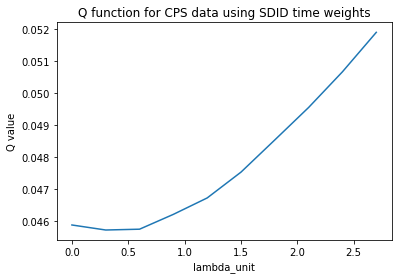

In [350]:
plt.plot(lambda_units,Q)
plt.xlabel('lambda_unit')
plt.ylabel('Q value')
plt.title('Q function for CPS data using SDID time weights')
plt.show()

## Select lambda_time

In [337]:
Q = []
lambda_times = np.arange(0,0.2,0.2/10)
for lambda_time in lambda_times:
    lambda_nn = 0.151
    lambda_unit = 0.3
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.3 0.0 0.151
0.04733931807582626
0.3 0.02 0.151
0.04696097857201654
0.3 0.04 0.151
0.04572646196172048
0.3 0.06 0.151
0.04718223543616423
0.3 0.08 0.151
0.04702813237410054
0.3 0.1 0.151
0.04677351506013778
0.3 0.12 0.151
0.04756926399168531
0.3 0.14 0.151
0.04706951415558455
0.3 0.16 0.151
0.048581005555868036
0.3 0.18 0.151
0.04904058291986118


In [338]:
lambda_times[np.argmin(Q)]

0.04

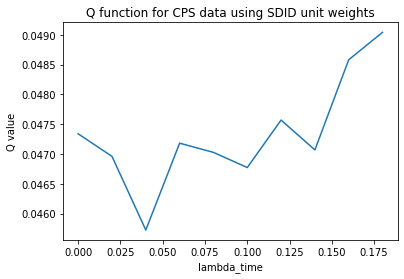

In [339]:
plt.plot(lambda_times,Q)
plt.xlabel('lambda_time')
plt.ylabel('Q value')
plt.title('Q function for CPS data using SDID unit weights')
plt.show()

### Select lambad_nn

In [340]:
Q = []
lambda_nns = np.arange(0.001,0.5,0.501/10)
for lambda_nn in lambda_nns:
    lambda_time = 0.04
    lambda_unit = 0.3
    print(lambda_unit,lambda_time,lambda_nn)
    ATEs = Parallel(n_jobs=36, prefer='processes')(
                 delayed(get_ATE)(trial,Y_true,lambda_unit=lambda_unit,lambda_time=lambda_time,lambda_nn=lambda_nn)
                 for trial in range(100))
    Q.append(np.sqrt(np.mean(np.square(ATEs))))
    print(np.sqrt(np.mean(np.square(ATEs))))

0.3 0.04 0.001
0.05875111230401435
0.3 0.04 0.0511
0.047002575287222
0.3 0.04 0.1012
0.04592367474906946
0.3 0.04 0.1513
0.045723923409727016
0.3 0.04 0.2014
0.04585499541106874
0.3 0.04 0.2515
0.04638353008604837
0.3 0.04 0.3016
0.046769989679083614
0.3 0.04 0.3517
0.04716080630740976
0.3 0.04 0.4018
0.04731951367366882
0.3 0.04 0.45189999999999997
0.0473807461240015


In [341]:
lambda_nns[np.argmin(Q)]

0.1513

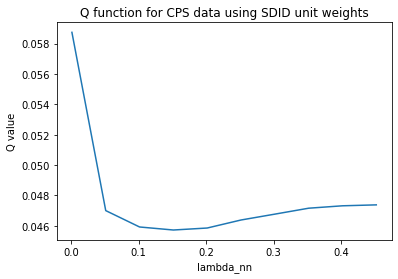

In [342]:
plt.plot(lambda_nns,Q)
plt.xlabel('lambda_nn')
plt.ylabel('Q value')
plt.title('Q function for CPS data using SDID unit weights')
plt.show()

In [343]:
Q

[0.05875111230401435,
 0.047002575287222,
 0.04592367474906946,
 0.045723923409727016,
 0.04585499541106874,
 0.04638353008604837,
 0.046769989679083614,
 0.04716080630740976,
 0.04731951367366882,
 0.0473807461240015]